The dataset was obained from kaggle.The data set consists of Placement data of students in a campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.With our data analysis,we are going to answer the following questions:
1.Which factor influenced a candidate in getting placed?
2.Does percentage matters for one to get placed?
3.Which degree specialization is much demanded by corporate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cp=pd.read_csv('Placement_Data_Full_Class.csv')
cp.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
cp['salary']=cp['salary'].fillna(0)

In [4]:
cp=cp.drop(columns=['sl_no'])
cp.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            215 non-null float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
cp_copy=cp.copy()

In [7]:
cat=(cp.dtypes=='object')
cat_cols=list(cat[cat].index)
cat_cols

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [8]:
for col in cat_cols:
    cp_copy[col]=cp_copy[col].astype('category')
    cp_copy[col+'_cat']=cp_copy[col].cat.codes

In [9]:
cp_copy=cp_copy.drop(columns=cat_cols)

In [10]:
cor=cp_copy.corr()['status_cat']
cor

ssc_p                 0.607889
hsc_p                 0.491228
degree_p              0.479861
etest_p               0.127639
mba_p                 0.076922
salary                0.865774
gender_cat            0.090670
ssc_b_cat             0.037297
hsc_b_cat             0.016945
hsc_s_cat             0.033442
degree_t_cat         -0.020352
workex_cat            0.276060
specialisation_cat   -0.250655
status_cat            1.000000
Name: status_cat, dtype: float64

Lets try to visualize our correlations!

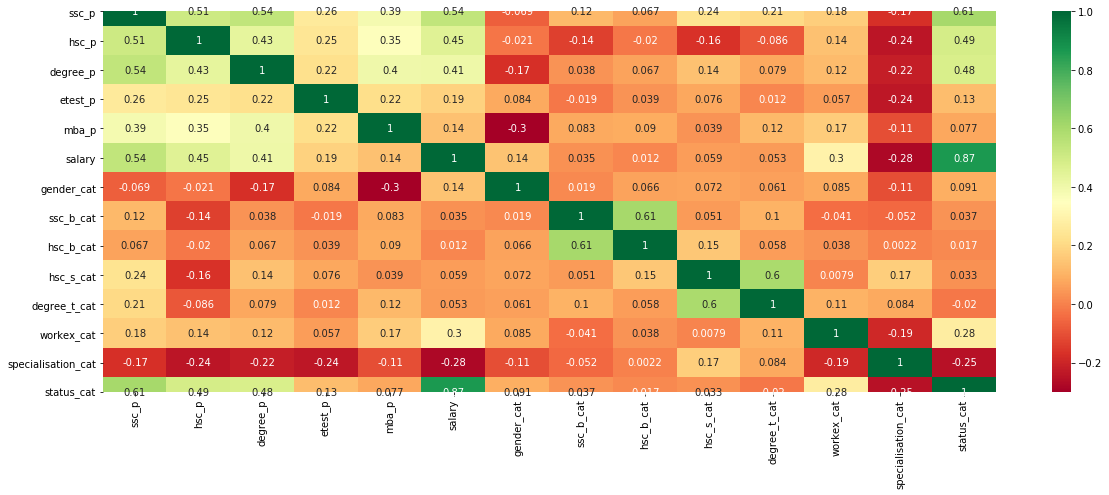

In [11]:
corr=cp_copy.corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

From the correlations,we can say that ssc percentages are highly correlated with a candidate getting placed.Whats surprising is that the employment test percentages have a low correlation with a candidate getting placed.HSC board percentage,degree percentage,work experience also show some correlation with the status column.Lets try to confirm our findings by visualizing our data.

# Data Visualization

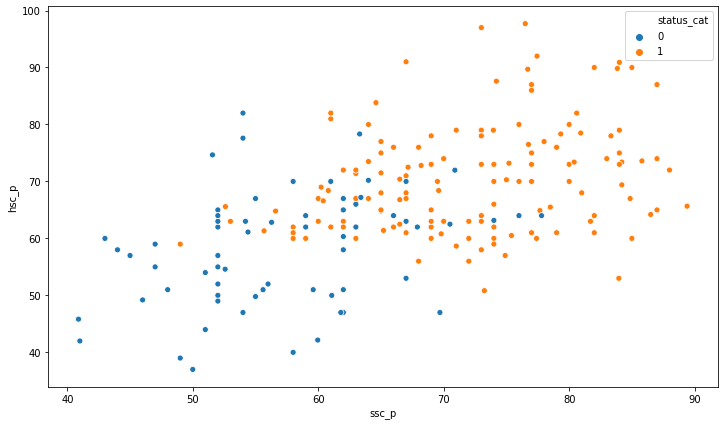

In [12]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=cp_copy['ssc_p'],y=cp_copy['hsc_p'],data=cp_copy,hue=cp_copy['status_cat'])
plt.show()

From the scatterplot we can see that most of the candidates with percentages greater than 60 in both ssc and hsc have been placed.This aligns well with the reality because most of the companies have certain threshold percentage that the candidate should have as an eligibility criteria.

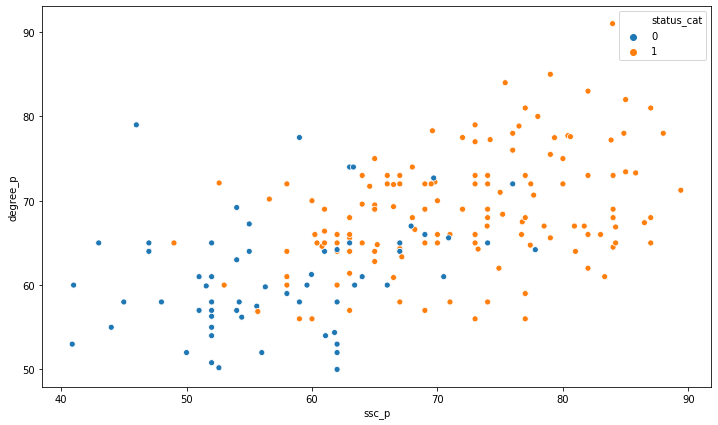

In [13]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=cp_copy['ssc_p'],y=cp_copy['degree_p'],data=cp_copy,hue=cp_copy['status_cat'])
plt.show()

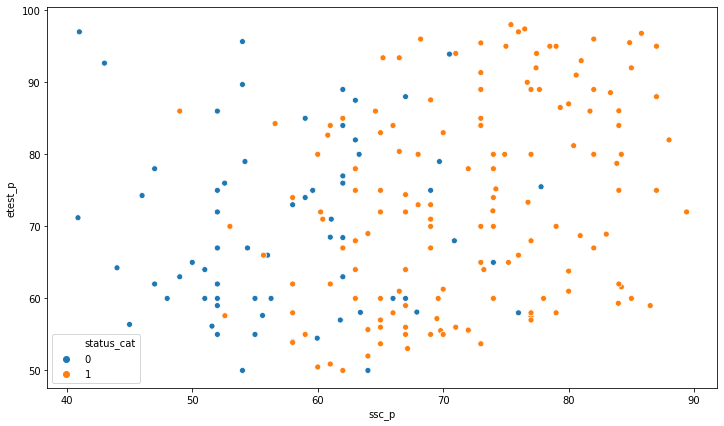

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=cp_copy['ssc_p'],y=cp_copy['etest_p'],data=cp_copy,hue=cp_copy['status_cat'])
plt.show()

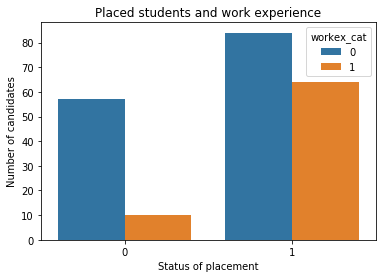

In [15]:
sns.countplot(x='status_cat',data=cp_copy,hue="workex_cat")
plt.title("Placed students and work experience")
plt.xlabel('Status of placement')
plt.ylabel('Number of candidates')
plt.show()

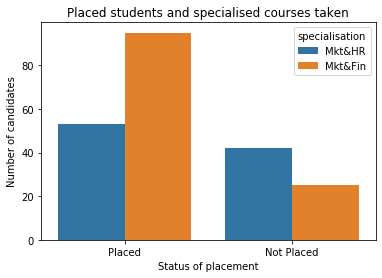

In [16]:
sns.countplot(x='status',data=cp,hue="specialisation")
plt.title("Placed students and specialised courses taken")
plt.xlabel('Status of placement')
plt.ylabel('Number of candidates')
plt.show()

From the graph,we can say that candidates having specialization in marketing and finance are more likely to get placed than candidates having specialisation in marketing and HR.

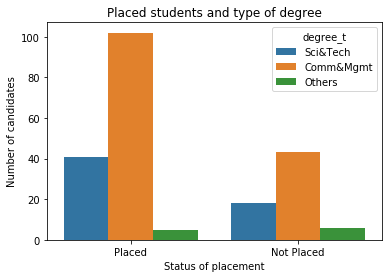

In [17]:
sns.countplot(x='status',data=cp,hue="degree_t")
plt.title("Placed students and type of degree")
plt.xlabel('Status of placement')
plt.ylabel('Number of candidates')
plt.show()

From this graph,its clear that candidates in Commerce and management stream are more likely to get placed than Science and technology.Strange but the data never lies!Now,we will move on to some feature engineering and check which columns are really useful for predicting the status column.

 # Feature Engineering

In [18]:
not_useful=['ssc_b_cat','hsc_b_cat']
cp_copy=cp_copy.drop(columns=not_useful,axis=1)
cp_copy.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender_cat', 'hsc_s_cat', 'degree_t_cat', 'workex_cat',
       'specialisation_cat', 'status_cat'],
      dtype='object')

In the above cell,we removed columns that have no impact on our target variable like for example,the ssc board of hsc board of the candidate does not matter during the selection process.These columns had very low correlation with our target variable and so we remove them.Another categorical column is describing the gender of the candidate.We need to examine this column to see whether the gender of the candidate plays any role in getting placed.

In [19]:
#table=pd.pivot_table(cp_copy,index='gender',values='',aggfunc=np.mean).to_dict()
male=cp_copy.groupby(['gender_cat'])
s=male.sum()['status_cat']
count=cp_copy['gender_cat'].value_counts()
m=139
f=76
male_p=(s[1]/m)*100
fem_p=(s[0]/f)*100
print(male_p,fem_p)

71.94244604316546 63.1578947368421


In the above cell,we calculated the percentage of selected male and female candidates.Total male applicants were 139 and total female applicants were 76.Out of these,100 male candidates and 48 female candidates were selected.The percentage male candidates selected and percentage female candidates selected is 72% and 63% respectively.The difference is not much and we cannot say that male candidates have higher chance or a female candidate has lower chance.So it seems like gender categorical variable is a not a useful one.

In [20]:
cp_copy=cp_copy.drop(columns=['gender_cat'],axis=1)
cp_copy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,hsc_s_cat,degree_t_cat,workex_cat,specialisation_cat,status_cat
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,0,1


Now that we have examined the correlations of different columns with our status column,we will try and analyze marginal probabilities of different columns with our target column i.e given a candidate has done some kind of specialisation what is the probability that he will get placed?

In [21]:
pd.crosstab(index = cp_copy['specialisation_cat'], columns=cp_copy['status_cat'], margins =True, normalize = True)

status_cat,0,1,All
specialisation_cat,,,
0,0.116279,0.441860,0.55814
1,0.195349,0.246512,0.44186
All,0.311628,0.688372,1.00000


In [22]:
pd.crosstab(index = cp_copy['degree_t_cat'], columns=cp_copy['status_cat'], margins =True, normalize = True)

status_cat,0,1,All
degree_t_cat,,,
0,0.200000,0.474419,0.674419
1,0.027907,0.023256,0.051163
2,0.083721,0.190698,0.274419
All,0.311628,0.688372,1.000000


In [23]:
cp_copy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,hsc_s_cat,degree_t_cat,workex_cat,specialisation_cat,status_cat
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
cp_copy=cp_copy.drop(columns=['salary'],axis=1)
cp_copy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,hsc_s_cat,degree_t_cat,workex_cat,specialisation_cat,status_cat
0,67.00,91.00,58.00,55.0,58.80,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,0,1


In [26]:
cp_copy1=cp_copy.copy()
cp_copy1=cp_copy1.drop(columns=['degree_t_cat'])

Now,lets try using some classification algorithms to predict whether a student gets placed or not.

# Classification Models

In [27]:
X=cp_copy1.iloc[:,:7]
y=cp_copy1.iloc[:,8]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [29]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
prediction=dt.predict(X_test)
score=accuracy_score(prediction,y_test)
score

0.7209302325581395

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=15,algorithm='kd_tree')
knn.fit(X_train,y_train)
predict=knn.predict(X_test)
score=accuracy_score(predict,y_test)
score

0.8604651162790697

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lg=LogisticRegression(solver='lbfgs',max_iter=200)
lg.fit(X_train,y_train)
p=lg.predict(X_test)
score=accuracy_score(p,y_test)
score

0.9069767441860465

We tried three models: Decision Tree,KNN and Logistic Regression and with the results we can see that Logistic Regression model has got better accuracy score.With such a simple model,we obtained 90% accuracy.